## Linear Algebra and Programming Skills
*Dr Jon Shiach, Department of Computing and Mathematics, Manchester Metropolitan University*

---
# Example Python Programs

This notebook contains some example programs to give you an idea of how we can use Python to perform calculations and plot images.

### Contents
1. [Calculating a root of a polynomial function using Newton's method](#Calculating-a-root-of-a-polynomial-function-using-Newton's-method)
1. [Calculating a matrix inverse using Gauss-Jordan elimination](#Calculating-a-matrix-inverse-using-Gauss-Jordan-elimination)
1. [Plotting the Mandelbrot Set](#Plotting-the-Mandelbrot-Set)
1. [Solving a system of ODEs](#Solving-a-system-of-ODEs)

---
## Calculating a root of a polynomial function using Newton's method
[Newton's method](https://en.wikipedia.org/wiki/Newton%27s_method) is a numerical algorithm for finding the root of a function. Let $f$ be a differentiable function which has a root at $x$ such that $f(x)=0$ then $x$ can be approximated using the iterative scheme

$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)},$$

where $f'$ is the derivative of $f$. The scheme is started with an initial guess value $x_0$.

For example consider the function $f(x) = x^2 - 4x - 7$. Here $f'(x) = 2x - 4$ so Newton's method for this function is

$$x_{n+1} = x_n - \frac{x_n^2 - 4x_n - 7}{2x_n - 4},$$

and using a starting value of $x_0=5$ we have

\begin{align*}
    x_0 &= 5, \\
    x_1 &= 5 - \frac{5^2 - 4(5) - 7}{2(5) - 4} = 5.333333, \\
    x_2 &= 5.333333 - \frac{5.333333^2 - 4(5.333333) - 7}{2(5.333333) - 4} = 5.316667, \\
    x_3 &= 5.316667 - \frac{5.316667^2 - 4(5.316667) - 7}{2(5.316667) - 4} = 5.316625, \\
    x_4 &= 5.316625 - \frac{5.316625^2 - 4(5.316625) - 7}{2(5.316625) - 4} = 5.316625.
\end{align*}

The difference in the values obtained in the last two iterations agree to six decimal places so we know this is close to the actual root. When using numerical methods, we use a *convergence tolerance* $tol$ which is some small number and we cease iterations when $|x_{n+1} - x_n| < tol$. The smaller the value of $tol$ the more accurate our approximation is but will require more iterations, and therefore computational effort, to calculate.

The program below uses Newton's method to find this root. Note that using functions to calculate $f(x)$ and $f'(x)$ means that we can easily adapt it to find the roots of other  functions.

In [1]:
import numpy as np

def f(x):
    """
    This function defines the function f(x)
    """
    return x**2 - 4 * x - 7


def df(x):
    """
    This function defines the derivative of f(x)
    """
    return 2 * x - 4


def newtons_method(x0, maxiter, tol):
    """
    This function uses Newton's method to compute the root of the function f(x) 
    """
    # Initialise solution array
    x = np.empty(maxiter)
    x[0] = x0
    
    # Iteration loop
    for n in range(maxiter):
        
        # Calculate new value of x using Newton's method
        x[n+1] = x[n] - f(x[n]) / df(x[n])
        
        # Check for convergence
        if abs(x[n+1] - x[n]) < tol:
            break
            
    # Trim x array
    x = x[:n+2]
    
    return x
    
    
# Define parameters
x0 = 5        # starting value
maxiter = 100 # maximum iteration limit
tol = 1e-6    # convergence tolerance

# Invoke Newton's method
x = newtons_method(x0, maxiter, tol)

# Print a table containing th estimates of the root
print("  n     x_n \n--------------")
for i in range(len(x)):
    print("{:3d} {:10.6f}".format(i, x[i]))

  n     x_n 
--------------
  0   5.000000
  1   5.333333
  2   5.316667
  3   5.316625
  4   5.316625


We can plot the function to check whether $f(x)=0$.

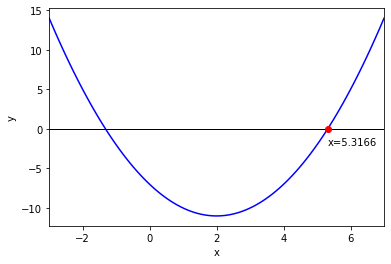

In [2]:
import numpy as np
import matplotlib.pyplot as plt

xmin, xmax = -3, 7
x1 = np.linspace(xmin, xmax, 100)

# Plot function and x-axis
fig, ax = plt.subplots()
ax.plot(x1, f(x1), 'b-')
ax.plot([xmin, xmax], [0, 0], 'k-', linewidth=1)

# Plot root
ax.plot(x[-1], 0, 'ro')
ax.text(x[-1], -2, 'x={:0.4f}'.format(x[-1]))

# Configure axes
ax.set_xlim(xmin, xmax)
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

Try altering the program to find the other root of this polynomial.

---
## Calculating a matrix inverse using Gauss-Jordan elimination
One method of calculating the inverse of a matrix $A$ is to form an augmented matrix $(A|I)$ and use [Gauss-Jordan elimination](https://en.wikipedia.org/wiki/Gaussian_elimination) to row reduce the left-hand matrix to reduced row echelon form (i.e., the left-hand matrix becomes the identity matrix). The right-hand matrix is now $A^{-1}$.

For example, consider $A = \begin{pmatrix} 1 & 2 \\ 3 & 4 \end{pmatrix}$

\begin{align*}
    &\pmatrix{1 & 2 & 1 & 0 \cr 3 & 4 & 0 & 1} & &\longrightarrow &
    &\pmatrix{3 & 4& 0 & 1 \cr 1 & 2 & 1 & 0} & &\longrightarrow &
    &\pmatrix{1 & 4/3 & 0 & 1/3 \cr 1 & 2 & 1 & 0} & &\longrightarrow \\
    &\pmatrix{1 & 4/3 & 0 & 1/3 \cr 0 & 2/3 & 1 & -1/3} & &\longrightarrow &
    &\pmatrix{1 & 4/3 & 0 & 1/3 \cr 0 & 1 & 3/2 & -1/2} & &\longrightarrow &
    &\pmatrix{1 & 0 & -2 &  1 \cr 0 & 1 & 3/2 & -1/2}
\end{align*}

So $A^{-1}=\begin{pmatrix} -2 & 1 \\ \frac{3}{2} & -\frac{1}{2} \end{pmatrix}$. We can check this using $A^{-1}A=I$

$$\begin{pmatrix} -2 & 1 \\ \frac{3}{2} & -\frac{1}{2} \end{pmatrix}
\begin{pmatrix} 1 & 2 \\ 3 & 4 \end{pmatrix} =
\begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}.$$

The program below uses Gauss-Jordan elimination to compute the inverse of the matrix $A$.

In [13]:
import numpy as np


def gauss_jordan(A):
    """
    This function performs elementary row operations on the matrix A
    to row reduce to reduced row echelon form.
    """
    nrows, ncols = A.shape
    for j in range(nrows):

        # Perform partial pivoting (swap pivot row with row containing
        # largest absolute value in the column beneath the pivot)
        maxpivot, maxpivotrow = A[j,j], j
        for i in range(j + 1, nrows):
            if A[i,j] > maxpivot:
                maxpivot, maxpivotrow = A[i,j], i
        A[[j,maxpivotrow],:] = A[[maxpivotrow,j],:]
        
        # Loop through rows of A and perform row operations
        A[j,:] = A[j,:] / A[j,j]
        for i in range(nrows):
            
            # Ignore pivot row
            if i == j:
                continue
            
            # Perform row operation
            A[i,:] = A[i,:] - A[i,j] * A[j,:]

    return A


def inv(A):
    """ 
    This function calculates the inverse of the matrix A using 
    Gauss-Jordan elimination
    """
    # Form augmented matrix
    nrows, ncols = A.shape
    A = np.concatenate((A, np.eye(nrows)), axis=1)

    # Use Gauss-Jordan to row reduce to reduced row echelon form
    A = gauss_jordan(A)

    # Return right-hand matrix
    return A[:, nrows:]


# Define matrix
A = np.array([[1, 2], [3, 4]])
print("A = \n")
print(A, end="\n\n")

# Calculate inverse matrix
invA = inv(A)
print("A^(-1) =\n")
print(invA, end="\n\n")

# Check inverse matrix (should return the identity matrix)
print("AA^(-1) =\n")
print(np.matmul(invA, A))

A = 

[[1 2]
 [3 4]]

A^(-1) =

[[-2.   1. ]
 [ 1.5 -0.5]]

AA^(-1) =

[[ 1.00000000e+00  0.00000000e+00]
 [-5.55111512e-17  1.00000000e+00]]


---
## Plotting the Mandelbrot Set

The [Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set) is defined by points in the complex plane $z_0\in \mathbb{C}$ where the iterative scheme

$$z_{n+1} = z_n^2 + z_0,$$

remains bounded. If, after a specified number of iterations, $|z_n|\leq 2$ then $z_0$ is a member of the Mandelbrot set. To write a program to determine members of the Mandelbrot set we can substitute $z = x + yi$ where $i^2=-1$ into the iterative scheme and derive expressions for updating the real and imaginary parts separately

\begin{align*}
    z_{n+1} &= z_n^2 + z_0 \\
    x_{n+1} + y_{n+1}i &= (x_n + y_ni)^2 + x_0 + y_0i \\
    &= x_n^2 + 2x_ny_ni - y_n^2 + x_0 + y_0i \\
    &= (x_n^2 - y_n^2 + x_0) + (2x_ny_n + y_0)i.
\end{align*}

Therefore $x_{n+1} = x_n^2 - y_n^2 + x_0$ and $y_{n+1} = 2x_ny_n + y_0$. 

The program below generates the Mandelbrot set over the domain $x\in[-2,1]$, $y\in[-1.2,1.2]$.  The iterative scheme for each point $z_0$ are calculated until $|z_n|>2$ or $n=100$ whichever comes earlier and the value of $n$ is recorded in an image array so that when plotted the colours provide an indication of the distance of each point from the Mandelbrot set. A [normalised iteration count](http://www.iquilezles.org/www/articles/mset_smooth/mset_smooth.htm) has been applied to smooth out the colours in the plot.

Note the program below uses the command `jit` from the [Numba](https://numba.pydata.org/numba-doc/latest/index.html) library to speed up the runtime of the `mandelbrot` function. `jit` is short for *Just In Time* and does some computer trickery to speed up calculations that use arrays and functions.

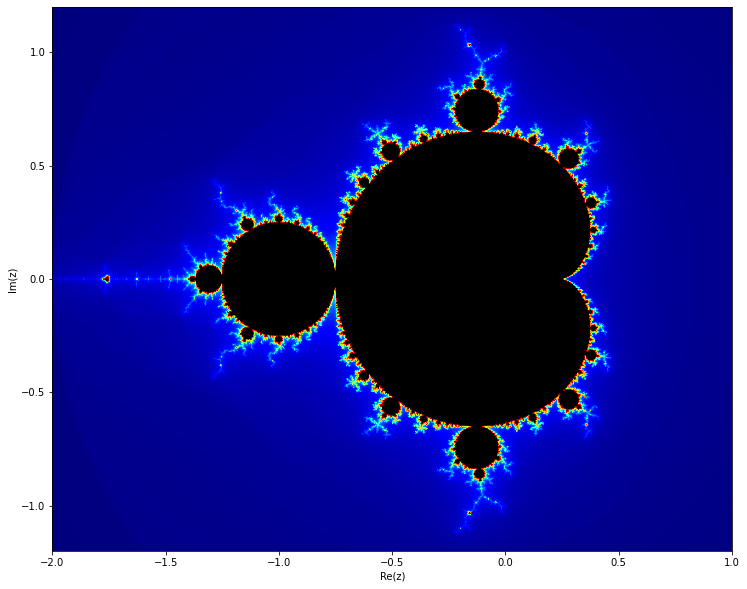

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
from numba import jit


@jit(nopython=True)
def mandelbrot(xmin, xmax, ymin, ymax, maxiter):
    """
    This function generates the Mandelbrot set for the real values
    the range [xmin, xmax] and imaginary values [ymin, ymax].
    """

    # Setup img array
    img = np.zeros((height, width))

    # Calculate change in real and imaginary values between pixels
    dx, dy = (xmax - xmin) / (width - 1), (ymax - ymin) / (height - 1)

    # Loop through all pixels in the img array
    for i in range(height):
        for j in range(width):

            # Initialise x, y, x0 and y0
            x, y, x0, y0 = 0, 0, xmin + j * dx, ymin + i * dy

            # Perform iterations for the current pixel
            for n in range(maxiter):

                # Smooth colours using normalized iteration count and 
                # exit iteration loop if |x+yi|>2
                if x**2 + y**2 > 4:
                    n = n + 1 - np.log2(np.log2(x**2 + y**2))
                    break

                # Calculate new values of x and y
                x, y = x**2 - y**2 + x0, 2 * x * y + y0

            # Update the img array
            img[i, j] = n

    return img[::-1, :]


# Define parameters
height, width = 1200, 800  # number of pixels
xmin, xmax, ymin, ymax = -2, 1, -1.2, 1.2  # real and imaginary limits
maxiter = 100  # max number of iterations used

# Generate Mandelbrot set
img = mandelbrot(xmin, xmax, ymin, ymax, maxiter)

# Add layer of black to the 'jet' colormap
jet = cm.get_cmap('jet', 1000)
newcolors = jet(np.linspace(0, 1, 1000))
newcolors[-1:, :] = np.array([0, 0, 0, 1])
mycmap = ListedColormap(newcolors)

# Plot Mandelbrot set
dpi = 80
figsize = height / dpi, width / dpi
fig, ax = plt.subplots(figsize=figsize)
ax.imshow(img, cmap=mycmap, extent=[xmin, xmax, ymin, ymax])
ax.set_xlabel('Re(z)')
ax.set_ylabel('Im(z)')
plt.show()

We can explore the Mandelbrot set by changing the values of `xmin`, `xmax`, `ymin`, `ymax` and `maxiter` and calling the `mandelbrot_set` function again to regenerate the `img` array. Uncomment/comment the lines below (or define your own values) to see the results.

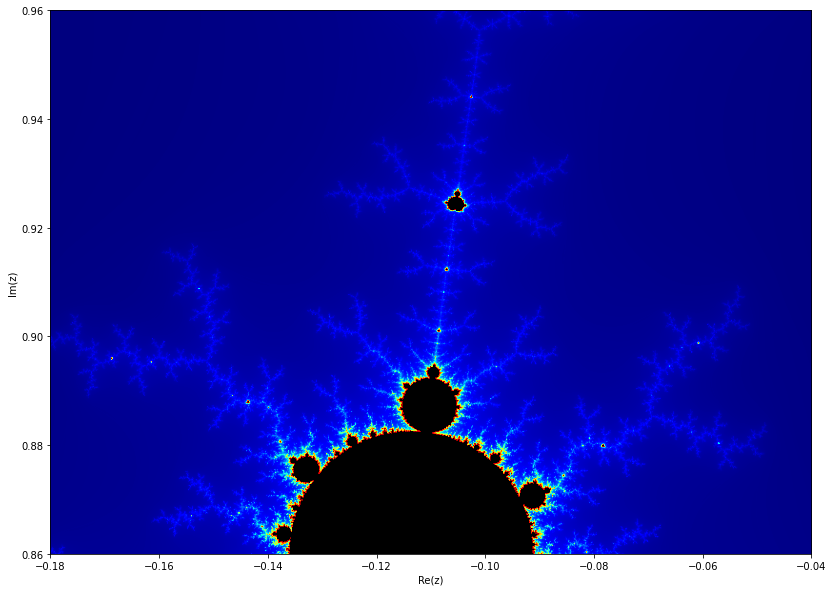

In [5]:
# Define real and imaginary values
xmin, xmax, ymin, ymax = -0.18, -0.04, 0.86, 0.96
# xmin, xmax, ymin, ymax = -0.8, -0.77, 0.135, 0.155
# xmin, xmax, ymin, ymax = -0.134, -0.124, 0.984, 0.992
# xmin, xmax, ymin, ymax = -0.749, -0.747, 0.1225, 0.124
maxiter = 400

# Generate Mandelbrot set
img = mandelbrot(xmin, xmax, ymin, ymax, maxiter)

# Plot Mandelbrot set
dpi = 80
figsize = height / dpi, width / dpi
fig, ax = plt.subplots(figsize=figsize)
ax.imshow(img, cmap=mycmap, extent=[xmin, xmax, ymin, ymax])
ax.set_xlabel('Re(z)')
ax.set_ylabel('Im(z)')
plt.show()

---
## Solving a system of ODEs

The well known [SIRD model](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIRD_model) is a system of 4 Ordinary Differential Equations (ODEs) that model the dynamics of an epidemic, e.g., the flu. 

\begin{align*}
    \frac{dS}{dt} &= -\frac{\beta I S}{N}, \\
    \frac{dI}{dt} &= \frac{\beta IS}{N} - \gamma I - \mu I, \\
    \frac{dR}{dt} &= \gamma I, \\
    \frac{dD}{dt} &= \mu I.
\end{align*}

where $S$ is the number of people susceptible to the virus, $I$ is the number of people infected, $R$ is the number of people who have recovered, $D$ is the number of people who have died and $N= S+I+R+D$ is the total number of people in the population. The model parameters are $\beta$, $\gamma$ and $\mu$ which are the rates of infection, recovery and mortality respectively.

The program below solves the SIRD system for the initial value problem $S(0)=999$, $I(0)=1$, $R(0)=D(0)=0$ with $\beta=0.3$, $\gamma = 0.05$ and $\mu=0.01$ using a Runge-Kutta method. Here we used the function `solve_ivp` from the [SciPy](https://docs.scipy.org/doc/scipy/reference/) library.


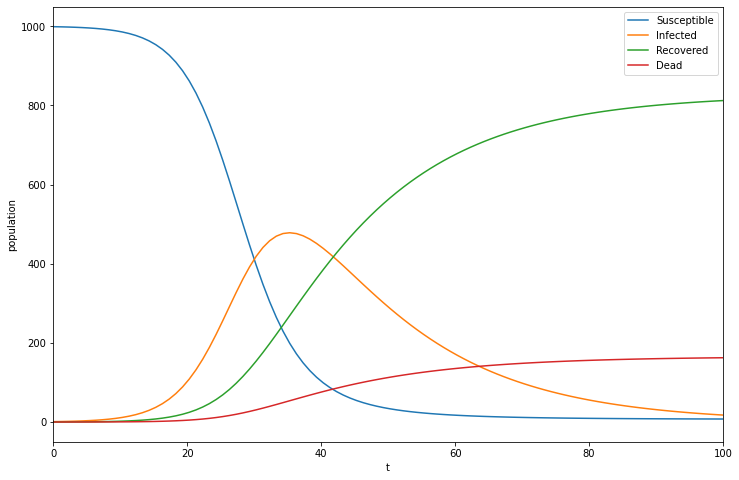

In [6]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


def SIRD_model(t, y):
    """
    This function defines the SIRD system of ODEs
    """
    # Unpack y array
    S, I, R, D = y
    N = sum(y)

    # Define SIRD system
    dydt = np.zeros(4)
    dydt[0] = -beta * I * S / N
    dydt[1] = beta * I * S / N - gamma * I - mu * I
    dydt[2] = gamma * I
    dydt[3] = mu * I

    return dydt


# Define IVP
y0 = np.array([999, 1, 0, 0])
t = np.array([0, 100])
beta, gamma, mu = 0.3, 0.05, 0.01

# Solve IVP (using 4/5th order Runge-Kutta method)
sol = solve_ivp(SIRD_model, t, y0, method='RK45', max_step=1)

# Plot solution
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(sol.t, sol.y.T)

ax.set_xlabel('t')
ax.set_ylabel('population')
ax.legend(['Susceptible', 'Infected', 'Recovered', 'Dead'])
ax.set_xlim(0, 100)

plt.show()